<a href="https://colab.research.google.com/github/Ferarenas14/Ferarenas14/blob/main/Polinomio_Hermite_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Polinomio Hermite Sympy

Polinomio de interpolación de Hermite:
4.0*x**5 - 40.0*x**4 + 152.0*x**3 - 271.0*x**2 + 228.0*x - 72.0


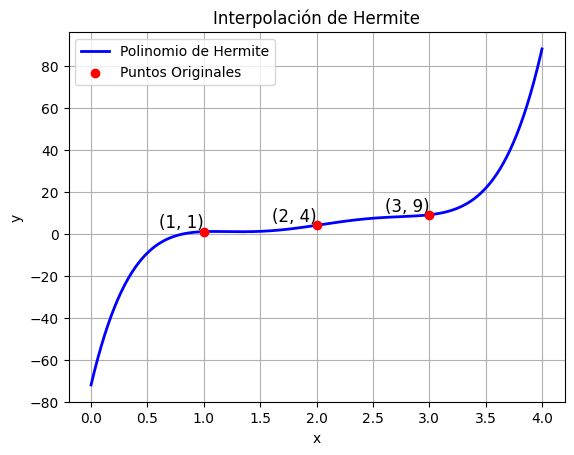

In [3]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Función para calcular el polinomio de interpolación de Hermite
def polinomio_hermite(x_datos, y_datos, derivadas):
    x = sp.symbols('x')

    # Inicializar el polinomio de Hermite
    polinomio = 0

    for i in range(len(x_datos)):
        # Calcular el polinomio base de Lagrange l_i(x)
        L = 1
        L_prime = 0

        for j in range(len(x_datos)):
            if i != j:
                L *= (x - x_datos[j]) / (x_datos[i] - x_datos[j])
                # Derivada de Lagrange L_i'(x)
                L_prime += 1 / (x_datos[i] - x_datos[j])

        # Término h_i(x) para la función
        h_i = L**2 * (1 - 2*(x - x_datos[i])*L_prime)
        # Término k_i(x) para la derivada
        k_i = L**2 * (x - x_datos[i])

        # Añadir al polinomio
        polinomio += y_datos[i] * h_i + derivadas[i] * k_i

    return sp.simplify(polinomio)

# Función para graficar el polinomio de Hermite y los puntos originales
def graficar(x_datos, y_datos, polinomio):


    # Crear un rango de valores de x para la gráfica del polinomio
    x_vals = np.linspace(min(x_datos) - 1, max(x_datos) + 1, 400)
    # Evaluar el polinomio de Hermite para los valores de x
    y_vals = np.array([float(polinomio.evalf(subs={sp.symbols('x'): val})) for val in x_vals])

    # Graficar el polinomio de Hermite
    plt.plot(x_vals, y_vals, label="Polinomio de Hermite", color="blue", linewidth=2)

    # Graficar los puntos originales
    plt.scatter(x_datos, y_datos, color="red", zorder=5, label="Puntos Originales")

    # Etiquetas de los puntos
    for i in range(len(x_datos)):
        plt.text(x_datos[i], y_datos[i], f"({x_datos[i]}, {y_datos[i]})", fontsize=12, verticalalignment='bottom', horizontalalignment='right')

    # gráfica
    plt.title("Interpolación de Hermite")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.show()

# Ejemplo
# Ingresar los puntos de la tabla de datos
x_datos = [1, 2, 3]  #  valores de x
y_datos = [1, 4, 9]  #  valores de y
derivadas = [2, 8, 6]  # derivadas f'(x) en los puntos

# Calcular el polinomio de interpolación de Hermite
polinomio = polinomio_hermite(x_datos, y_datos, derivadas)

# Mostrar el polinomio
print("Polinomio de interpolación de Hermite:")
print(polinomio)

# Graficar el polinomio junto con los puntos originales
graficar(x_datos, y_datos, polinomio)